# ТИПЫ КОРЕЛЯЦИЙ

## КОРРЕЛЯЦИЯ ПИРСОНА

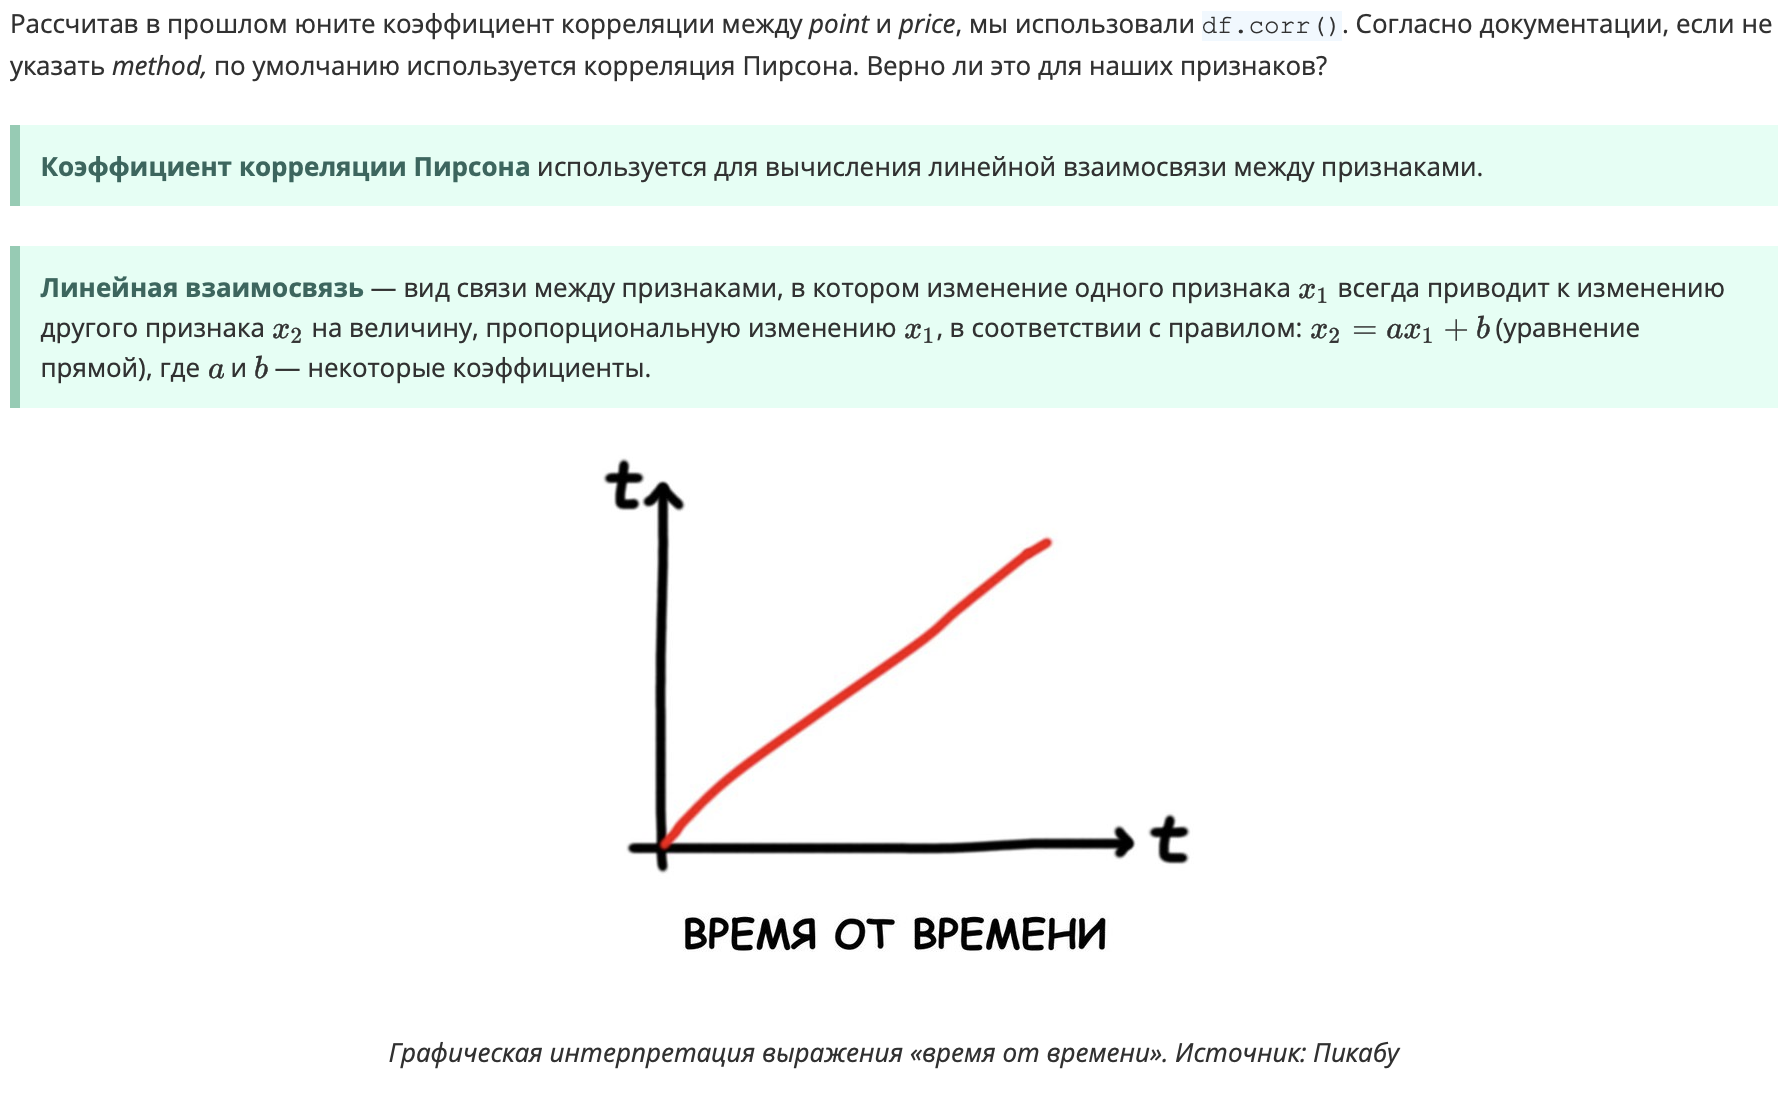

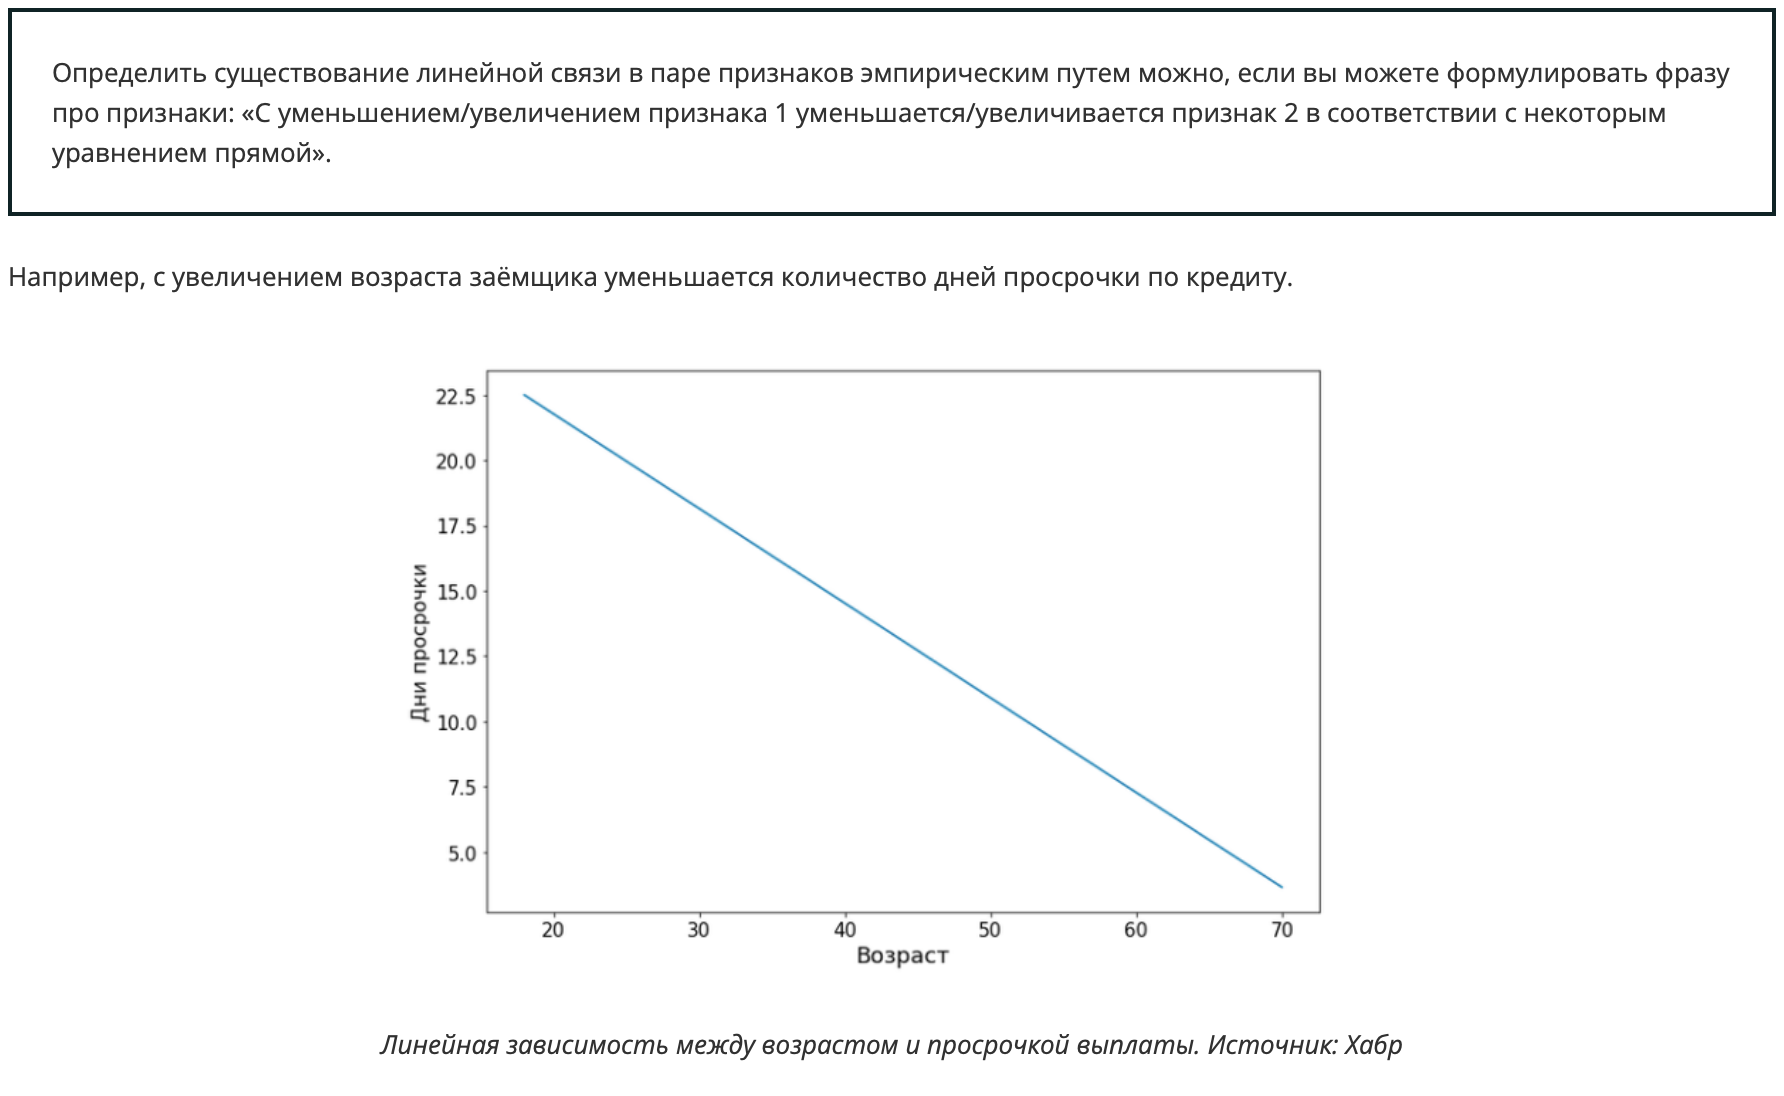

Более точной является визуализация зависимости признаков. С этим подходом мы подробнее познакомимся в следующем юните, посвящённом визуализации связей между признаками.

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

### НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать нормальным распределением. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

Если признак является совокупностью очень редких событий, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot. 

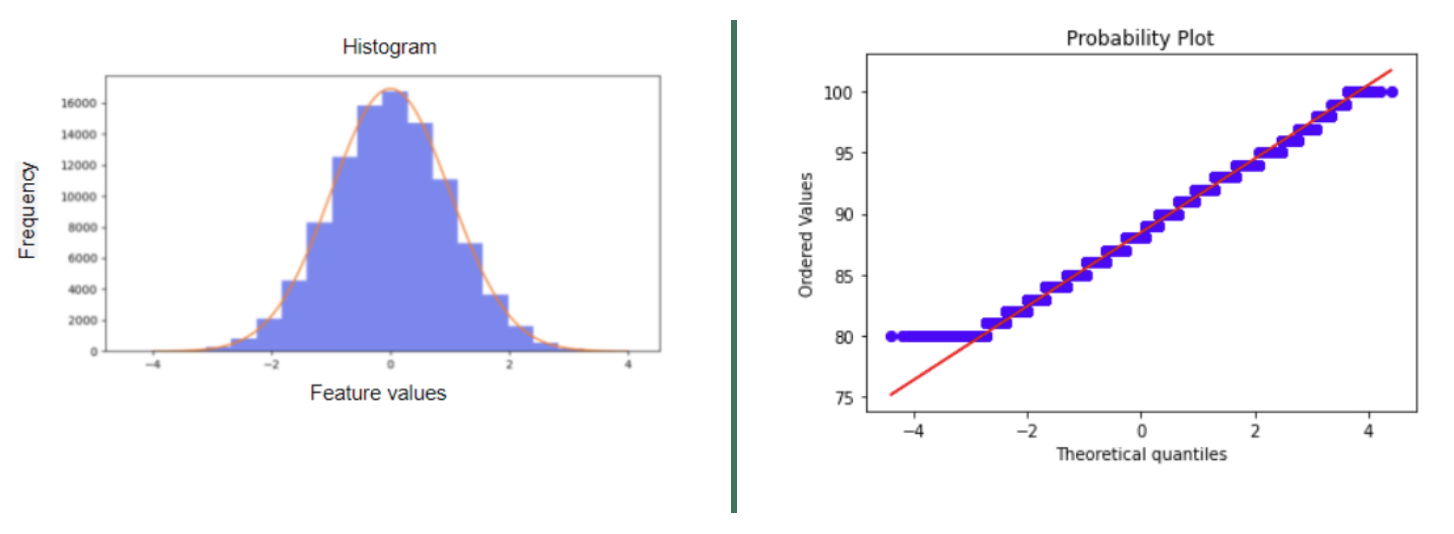

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а q-q plot должен напоминать прямую линию (правый график на рисунке).

Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом stats статистических распределений и функций, а также знакомой нам библиотекой matplotlib для построения графиков.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt # библиотека визуализации
import plotly.express as px
from scipy import stats # библиотека для расчетов

In [24]:
wine_data = pd.read_csv('data/wine_cleared.csv')

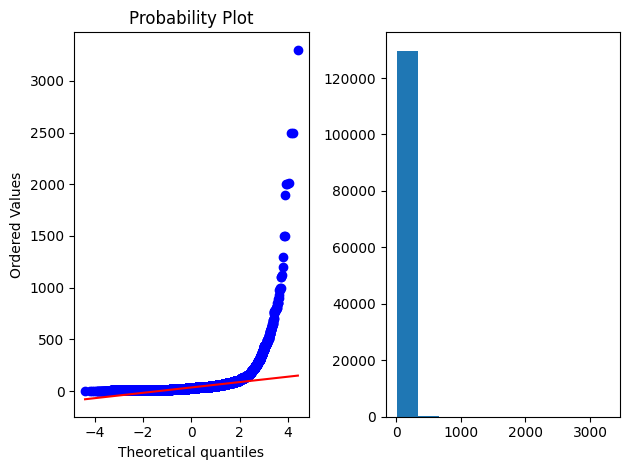

In [25]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Кажется, признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.



Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.

### Задание 4.2

Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:

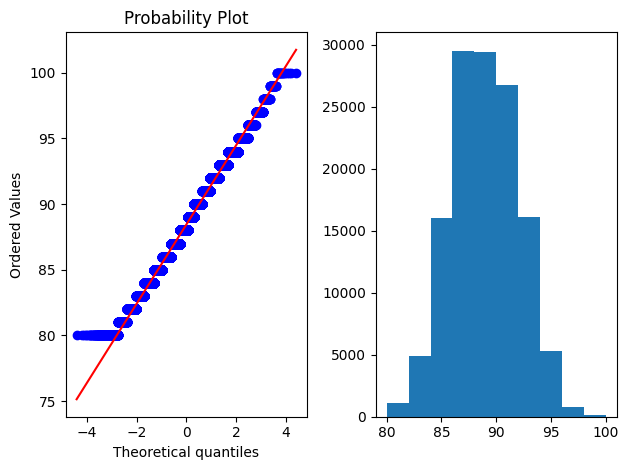

In [26]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Итак, что мы узнали в этом юните?

Корреляция между непрерывными признаками, которые имеют близкое к нормальному распределение, может быть рассчитана с использованием стандартной корреляции Пирсона. 

Для категориальных данных используется методы ранговой корреляции, например Спирмена и Кендалла, которые будут изучены в следующем юните. 

Для непрерывных переменных, имеющих большое количество выбросов или распределённых ненормально, могут использоваться методы по устранению выбросов и нормализации данных, которые будут изучены далее в курсе. Также могут быть использованы методы ранговой корреляции.


**Ранговая корреляция** — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. 
**Ранги** — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.

## КОРРЕЛЯЦИЯ СПИРМЕНА

Коэффициент корреляции Спирмена используется для вычисления взаимосвязей между категориальными переменными.

Чтобы рассчитать коэффициент корреляции Спирмена, вам необходимо передать в df.corr() аргумент method = 'spearman' .

In [31]:
corr_spear = wine_data[['price','points']].corr(method='spearman')
display(corr_spear)

,price,points
price,1.000000,0.581095
points,0.581095,1.000000


Но разве мы не допустили ошибку, рассчитав коэффициент корреляции Спирмена для числового признака, а не категориального? 

Не совсем. Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь. 

Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций. 

Например, в нашем случае один из признаков price распределён ненормально, связь между ними также не является линейной. Корреляция по Пирсону составляет 0.4, что говорит о слабой связи признаков. А корреляция по Спирмену составляет 0.58, что говорит о более сильной связи. 

Скорее всего, корреляция Спирмена в данном случае будет более верным вариантом, но для точного ответа нам необходимо будет удовлетворить условиям корреляции Спирмена или корреляции Пирсона. Для этого будут необходимы преобразования, которые мы изучим в следующих модулях EDA.

Так же, как и коэффициент Пирсона, коэффициент Спирмена распределён [-1; 1] с такой же интерпретацией силы связи, рассмотренной нами в предыдущих юнитах.

Для ранговой корреляции существует ещё один метод расчёта — корреляция Кендалла.

### КОРРЕЛЯЦИЯ КЕНДАЛЛА

Так же, как и корреляция Спирмена, корреляция Кендала предусмотрена для нахождения взаимосвязей между категориальными переменными. Для расчёта коэффициента корреляции Кендалла необходимо передать в изученный нами метод df.corr() аргумент method = 'kendall'

### Задание 5.2

Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [32]:
corr_kendall = wine_data[['price','points']].corr(method='kendall')
display(corr_kendall)

,price,points
price,1.000000,0.433498
points,0.433498,1.000000


Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена. 

В нашем случае корреляция Кендалла равна 0.43 при коэффициенте корреляции Спирмена 0.58, однако она всё так же выше коэффициента корреляции Пирсона, что говорит о большей связи, чем в вычислении по Пирсону.

Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.

``В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.``

Даже такой грубый анализ без учёта всех условий для корреляций может быть полезен и позволяет сделать предварительные выводы для дальнейшей работы с признаками.

## КОРРЕЛЯЦИЯ МЭТЬЮСА

Бинарные признаки являются подгруппой категориальных. Мы по-прежнему можем использовать методы ранговых корреляций для расчёта связи между переменными. 

Кроме этого, существует корреляция Мэтьюса — мера силы связи между бинарными переменными.

В df.corr() нет расчёта для корреляции Мэтьюса, но мы можем воспользоваться библиотекой scikit-learn и её функцией matthews_corrcoef() для расчёта коэффициента корреляции Мэтьюса.

scikit-learn — это библиотека с реализацией готовых алгоритмов для машинного обучения. Более подробно вы познакомитесь с ней в модулях, посвящённых машинному обучению.

In [33]:
from sklearn.metrics import matthews_corrcoef

В нашем датасете винных обзоров нет бинарных переменных, но мы можем воспользоваться учебным примером.

Пример. Создадим два случайных признака x, y и зададим им бинарные значения.

In [34]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

Коэффициент корреляции Мэтьюса может быть полезен в случае, когда в датасете представлены только бинарные переменные. Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны. 

Например, при предсказании дефолтности клиента у нас может быть только два исхода: 1 — дефолт, 0 — не дефолт. Подробнее об оценке моделей вы узнаете дальше, в модулях, посвящённых машинному обучению.

Итак, этом юните мы узнали о ранговых корреляциях для категориальных признаков, а также о корреляции для бинарных признаков. В следующем юните мы изучим визуализацию корреляций.

